#### Importing Python libraries

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Loading the dataset

In [2]:
df = pd.read_csv('heart.csv')

#### Displaying the first 5 observations

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Displaying the last 5 observations

In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Displaying the number of observations(rows) and attributes(columns)

In [5]:
df.shape

(918, 12)

#### Displaying the attributes and their data type

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset. If data is incorrect, outcomes and algorithms become unreliable, even though they may be implemented correctly because of this it becomes crucial to perform data cleaning.

The most common data cleaning practices include:

<ul style="list-style-type:square">
    <li>Handling missing data</li>
    <li>Removing duplicate or irrelevant observations</li>
    <li>Fixing structural errors such as strange naming conventions, typos or incorrect capitalization</li>
    <li>Filtering unwanted outliers (if needed)</li>
</ul>

- Handling missing data

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Handling duplicate data

In [8]:
df.duplicated().sum()

0

- Fixing structural errors

In [9]:
for col in df.columns:
    print(col)
    print(set(df[col]), "\n")

Age
{28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77} 

Sex
{'F', 'M'} 

ChestPainType
{'TA', 'ATA', 'ASY', 'NAP'} 

RestingBP
{128, 0, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 129, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 185, 190, 192, 200, 80, 92, 94, 95, 96, 98, 100, 101, 102, 104, 105, 106, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127} 

Cholesterol
{0, 518, 529, 564, 85, 603, 100, 110, 113, 117, 123, 126, 129, 131, 132, 139, 141, 142, 147, 149, 152, 153, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

- Handling outliers

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Data Preprocessing

<ul style="list-style-type:square">
    <li>Normalizing Data</li>
    <li>Converting categorical data into numerical data</li>
</ul>

- Normalizing Data

In [11]:
scaler = MinMaxScaler()
data = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
scaler.fit(data)
scaled_data = np.matrix(scaler.transform(data))
print(scaled_data)

[[0.24489796 0.7        0.47927032 0.78873239 0.29545455]
 [0.42857143 0.8        0.29850746 0.67605634 0.40909091]
 [0.18367347 0.65       0.46932007 0.26760563 0.29545455]
 ...
 [0.59183673 0.65       0.2172471  0.38732394 0.43181818]
 [0.59183673 0.65       0.39137645 0.8028169  0.29545455]
 [0.20408163 0.69       0.29021559 0.79577465 0.29545455]]


In [12]:
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
scaled_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455


In [13]:
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    df.drop(col, axis=1)
    df[col] = scaled_df[col]


df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0,Normal,0.436620,N,0.295455,Up,0


- Converting categorical data into numerical data

In [14]:
df = pd.get_dummies(df) 
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Feature Selection

In [15]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0,0.788732,0.295455,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0,0.676056,0.409091,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0,0.267606,0.295455,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0,0.338028,0.465909,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0,0.436620,0.295455,0,1,0,0,1,0,0,1,0,1,0,0,0,1


### Naïve Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm which is used for classification. It is also part of the family of generative learning algorithms which means that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

Naïve Bayes is also known as a probabilistic classifier since it is based on Bayes’ Theorem. Bayes’ Theorem is distinguished by its use of sequential events where information acquired later impacts the initial probability. These probabilities are denoted as the prior probability and the posterior probability. The prior probability is the probability of the occurence of an event before it has been contextualized under a certain condition whereas the posterior probability is the probability of the occurence of an event after it has been contextualized under a certain condition.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Making predictions on test set
y_pred = gnb.predict(x_test)

# Actual values VS Predicted values
gnb_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
gnb_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

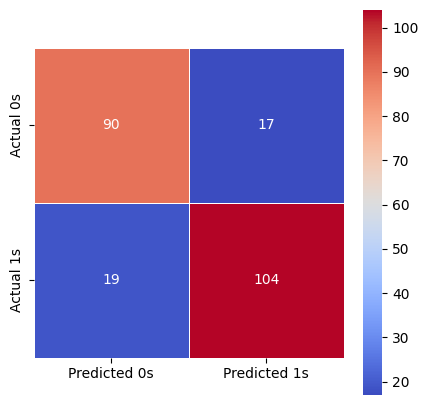

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='coolwarm')

In [19]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8434782608695652
Model Precision:  0.859504132231405
Model Recall:     0.8455284552845529
Model F1 Score:   0.8524590163934428


### Logistic Regression

Logistic Regression is used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on the attributes of the dataset. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds which means that the probability of success divided by the probability of failure

In [40]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [i / 10 for i in range(1, 11)],
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(n_jobs=-1)
lr_cv = GridSearchCV(lr, param_grid, n_jobs=-1, refit=False, scoring='precision', cv=5)
lr_cv.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit=False, scoring='precision')

In [41]:
print("Best Score: ", lr_cv.best_score_)
print("Best Parameter Combination: \n", lr_cv.best_params_)

Best Score:  0.8556361572931686
Best Parameter Combination: 
 {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

# Fitting the Logistic Regression model
lr = LogisticRegression(penalty='l1', C=0.1, fit_intercept=True, solver='liblinear')
lr.fit(x_train, y_train)

# Making predictions on test set
y_pred = lr.predict(x_test)

# Actual values VS Predicted values
lr_data = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
lr_data.head()

,Actual value,Predicted value
242,1,1
441,1,1
260,0,0
546,1,1
847,0,0


<Axes: >

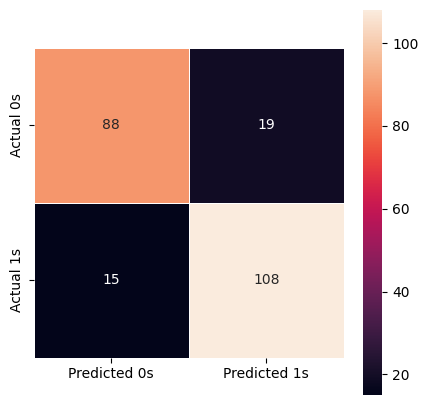

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='rocket')

In [50]:
# Model Evaluation
print('Model Accuracy:  ', accuracy_score(y_test, y_pred))
print('Model Precision: ', precision_score(y_test, y_pred))
print('Model Recall:    ', recall_score(y_test, y_pred))
print('Model F1 Score:  ', f1_score(y_test, y_pred))

Model Accuracy:   0.8521739130434782
Model Precision:  0.8503937007874016
Model Recall:     0.8780487804878049
Model F1 Score:   0.8639999999999999
